In [12]:
from Functions import *


In [13]:
''' loop parameters '''
NN = 200
#f1_list = np.linspace(-0.1,0.1,NN)+9.83939393939394
f1_list = np.linspace(-1,1,NN)+9.0
duration = np.zeros(NN)
#alphaAsym = np.deg2rad(27.98)

if_plot = 1
if_loop = 1


In [17]:
''' Beam parameters '''
N = 4096			# number of sampling points
E0 = 9000			# photon energy [eV]
tau = 400			# pulse duration [fs]
window = 1000000		# total simulation time window [fs]

''' OE parameters '''
# hkl = [6,6,0]
hkl = [4,4,0]
#hkl = [3,3,3] 

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
	'photonEnergy': E0,
	'N': N,
	'sigma_x': 23e-6,
	'sigma_y': 23e-6,
	'rangeFactor': 5,
	'scaleFactor': 10,
	'z_source': 630
}

In [18]:
''' IO '''
path = '../{} eV/'.format(E0)
make_dir(path)

fig_path = path+'f1_scan'
make_dir(fig_path)

hkl_ = int(hkl[0]*100+hkl[1]*10+hkl[2])
fname = 'pulse_duration_{}_{}keV'.format(
    hkl_, round(beam_params['photonEnergy']/1000.,4))


path exists
path exists


In [19]:
''' Define beamline '''
try: alphaAsym
except:
    crystal_temp = optics.Crystal('crystal', hkl=hkl, length=10e-2, width=20e-3, z=930, E0=E0,
                                  alphaAsym=0, orientation=0, pol='s', delta=0.e-6)

    alphaAsym = crystal_temp.alpha - np.deg2rad(5)      # calculate miscut angle (5 degree grazing incidence)

    if alphaAsym <= 0:
        print('\n***\n***\n*** Bragg angle smaller than grazing angle')

f1 = f1_list.mean()
f2 = 10.

devices = define_devices(f1,f2,slit_width = 2000e-6, hkl = hkl,
                         alphaAsym = alphaAsym, E0=E0, f0 = 290., d23=7.)

b 1.00
b 15.49
crystal 2 incidence angle: 86.11 degrees
crystal 2 exit angle: 3.69 degrees
b 1.00
b 0.06


In [6]:
%%capture capt
''' propagate '''
mono_beamline = beamline.Beamline(devices)

tstart = time.time()
beam_params['photonEnergy'] = E0
pulse = beam.Pulse(beam_params=beam_params, tau=tau, time_window=window)

pulse.propagate(beamline=mono_beamline, screen_names=['im1','focus','im2'])
tfin = time.time()

In [7]:
np.round(tfin-tstart)

1101.0

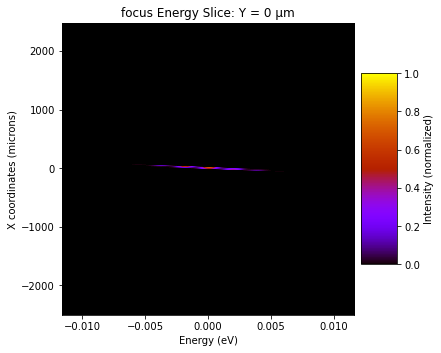

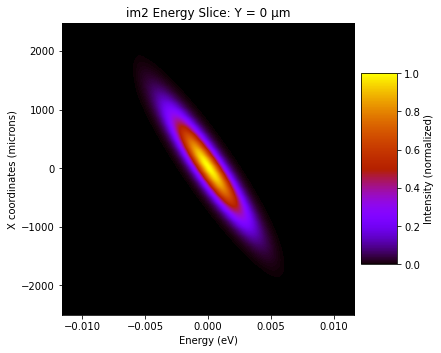

In [8]:
''' energy slices '''
pulse.imshow_energy_slice('focus')
pulse.imshow_energy_slice('im2')


(<matplotlib.axes._subplots.AxesSubplot at 0x1baf7c0edc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1baf8282a88>)

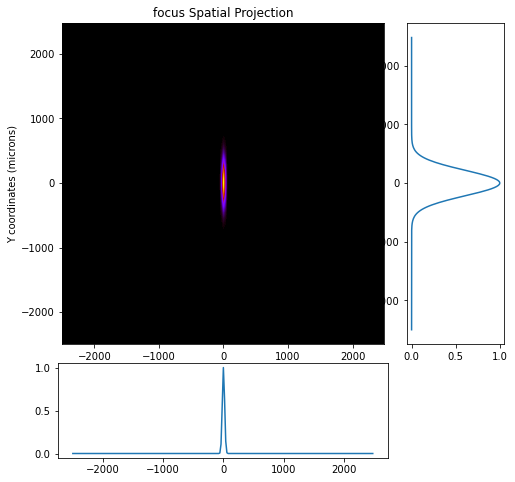

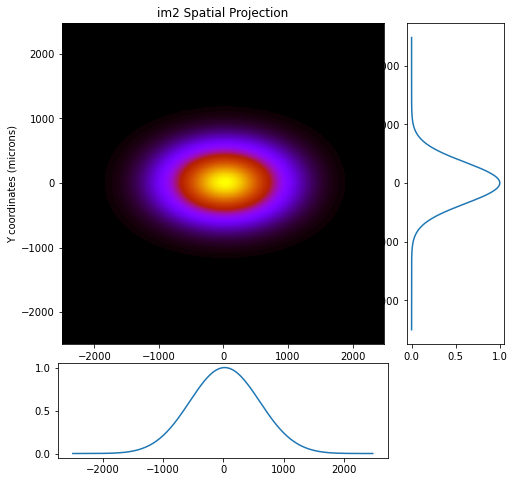

In [9]:
''' spatial projection (x,y)'''
pulse.imshow_projection('focus')
plt.savefig(path+'spatial_profile_at_focus.png', transparent = True)
pulse.imshow_projection('im2')


total 1100.61s, per slice 195.8ms
Fit failed. Using second moment for width.


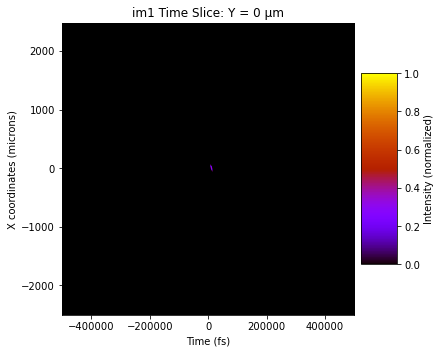

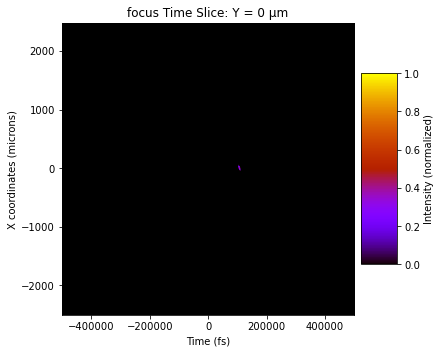

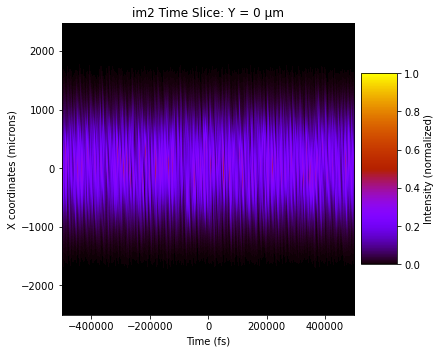

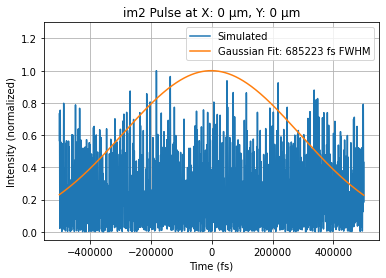

In [10]:
''' plot time slices '''
print('total {}s, per slice {}ms'.format(round(tfin-tstart,2), round(1000*(tfin-tstart)/pulse.N,2)))

shift = 0
pulse.imshow_time_slice('im1',shift=shift)
pulse.imshow_time_slice('focus', shift = shift)
pulse.imshow_time_slice('im2', shift = shift)
pulse.plot_pulse('im2', shift = shift)


In [11]:
import winsound
winsound.PlaySound("*", winsound.SND_ALIAS)
winsound.PlaySound("*", winsound.SND_ALIAS)
winsound.PlaySound("*", winsound.SND_ALIAS)